# Metabolic network modeling with COBRA

## Databases of models
1. Biomodels https://www.ebi.ac.uk/biomodels-main/publmodels
2. BiGG http://bigg.ucsd.edu/
3. HMA http://www.metabolicatlas.org

## Documentation of cobrapy and cobra toolbox
1. https://cobrapy.readthedocs.io/en/stable/index.html
2. https://opencobra.github.io/cobratoolbox/stable/

## Solvers
1. Gurobi http://www.gurobi.com
2. cplex https://www.ibm.com/products/ilog-cplex-optimization-studio
3. scipy

To install `cobrapy`, run the following code below (requires pip):

In [5]:
# install cobrapy
!pip install cobra
!pip install pytest

In [6]:
# load modules
from cobra.test import create_test_model
import cobra

In [7]:
# check cobra version
cobra.__version__

'0.17.1'

In [4]:
help(create_test_model)

Help on function create_test_model in module cobra.test:

create_test_model(model_name='salmonella')
    Returns a cobra model for testing
    
    model_name: str
        One of 'ecoli', 'textbook', or 'salmonella', or the
        path to a pickled cobra.Model



In [8]:
# load a cobra model that was downloaded with the cobrapy package
model = create_test_model("textbook")

Using license file C:\Users\user\gurobi.lic
Academic license - for non-commercial use only


In [ ]:
model

### You can also load a exist model by using io functions like load_matlab_model, read_sbml_model ...

In [ ]:
## io functions

# cobra.io.read_sbml_model
# cobra.io.load_json_model
# cobra.io.load_matlab_model
# cobra.io.load_yaml_model

## Components of model
### Model (`cobra.core.model.Model`)

-------------

#### attribute:

<table>
    <tr>
        <th>Attribute</th>
        <th>Type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>reactions</td>
        <td>DictList</td>
        <td>A DictList where the key is the reaction identifier and the value a Reaction</td>
    </tr>
    <tr>
        <td>metabolites</td>
        <td>DictList</td>
        <td>A DictList where the key is the metabolite identifier and the value a Metabolite</td>
    </tr>
    <tr>
        <td>genes</td>
        <td>DictList</td>
        <td>A DictList where the key is the gene identifier and the value a Gene</td>
    </tr>
    <tr>
        <td>solution</td>
        <td>cobra.Solution</td>
        <td>The last obtained solution from optimizing the model.</td>
    </tr>
    <tr>
        <td>boundary</td>
        <td>DictList</td>
        <td>Boundary reactions in the model. Reactions that either have no substrate or product.</td>
    </tr>
    <tr>
        <td>exchanges</td>
        <td>DictList</td>
        <td>Exchange reactions in model. Reactions that exchange mass with the exterior. Uses annotations and heuristics to exclude non-exchanges such as sink reactions.</td>
    </tr>
    <tr>
        <td>demands</td>
        <td>DictList</td>
        <td>Demand reactions in model. Irreversible reactions that accumulate or consume a metabolite in the inside of the model.</td>
    </tr>
    <tr>
        <td>sinks</td>
        <td>DictList</td>
        <td>Sink reactions in model. Reversible reactions that accumulate or consume a metabolite in the inside of the model.</td>
    </tr>
    <tr>
        <td>objective</td>
        <td>optlang.interface.Objective</td>
        <td>Before introduction of the optlang based problems, this function returned the objective reactions as a list. With optlang, the objective is not limited a simple linear summation of individual reaction fluxes, making that return value ambiguous. Henceforth, use cobra.util.solver.linear_reaction_coefficients to get a dictionary of reactions with their linear coefficients (empty if there are none)<br>
The set value can be dictionary (reactions as keys, linear coefficients as values), string (reaction identifier), int (reaction index), Reaction or problem.Objective or sympy expression directly interpreted as objectives.</td>
    </tr>
</table>

#### methods:
<table>
    <tr>
        <th>Method</th>
        <th>Parameters</th>
        <th>Return type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>copy</td>
        <td>None</td>
        <td>cobra.Model</td>
        <td>Provides a partial ‘deepcopy’ of the Model. All of the Metabolite, Gene, and Reaction objects are created anew but in a faster fashion than deepcopy</td>
    </tr>
    <tr>
        <td>add_metabolites</td>
        <td>metabolite_list (list)</td>
        <td>None</td>
        <td>Will add a list of metabolites to the model object and add new constraints accordingly.</td>
    </tr>
    <tr>
        <td>remove_metabolites</td>
        <td>metabolite_list (list)<br>
            destructive (bool)
        </td>
        <td>None</td>
        <td>Remove a list of metabolites from the the object.</td>
    </tr>
    <tr>
        <td>add_boundary</td>
        <td>metabolite (cobra.Metabolite) <br>
            type (str, {"exchange", "demand", "sink"})<br>
            reaction_id (str, optional)<br>
            lb (float, optional)<br>
            ub (float, optional)<br>
            sbo_term (str, optional)</td>
        <td>cobra.Reaction</td>
        <td>Add a boundary reaction for a given metabolite.<br>
There are three different types of pre-defined boundary reactions: exchange, demand, and sink reactions. An exchange reaction is a reversible, unbalanced reaction that adds to or removes an extracellular metabolite from the extracellular compartment. A demand reaction is an irreversible reaction that consumes an intracellular metabolite. A sink is similar to an exchange but specifically for intracellular metabolites.<br>
If you set the reaction type to something else, you must specify the desired identifier of the created reaction along with its upper and lower bound. The name will be given by the metabolite name and the given type.</td>
    </tr>
    <tr>
        <td>add_reactions</td>
        <td>reaction_list (list) </td>
        <td>None</td>
        <td>Add reactions to the model.<br>
            Reactions with identifiers identical to a reaction already in the model are ignored.</td>
    </tr>
    <tr>
        <td>remove_reactions</td>
        <td>reaction_list (list)<br>
            remove_orphans (bool)
        </td>
        <td>None</td>
        <td>Remove reactions from the model.</td>
    </tr>
    <tr>
        <td>slim_optimize</td>
        <td>error_value (float, None)<br>
            message (string)
        </td>
        <td>float</td>
        <td>Optimize model without creating a solution object.</td>
    </tr>
    <tr>
        <td>optimize</td>
        <td>objective_sense ({None, 'maximize' 'minimize'}, optional)<br>
            raise_error (bool)
        </td>
        <td>cobra.Solution</td>
        <td>Optimize the model using flux balance analysis.</td>
    </tr>
    <tr>
        <td>summary</td>
        <td>solution (cobra.Solution, optional)<br>
            threshold (float, optional)<br>
            fva (pandas.DataFrame or float, optional)<br>
            names (bool, optional)<br>
            float_format (callable, optional)
        </td>
        <td>cobra.ModelSummary</td>
        <td>Create a summary of the exchange fluxes of the model.</td>
    </tr>
</table>


<style>
th {
    border-bottom: dotted #696969 2px;
}

td {
    border-bottom: solid #999999 2px;
    padding: 5px;
}

table {
     padding: 10px; 
     border: solid #696969 3px; 
     width: 100%;
}
</style>

In [9]:
# components of a cobra Model

print(f"{len(model.reactions)} Reactions in the model\n------------------")
for r in model.reactions[:10]:
    print(f"{r.id}: {r.reaction}, associated with {r.gene_name_reaction_rule}")
print()


print(f"{len(model.metabolites)} Metabolites in the model\n------------------")
for m in model.metabolites[:10]:
    print(f"{m.id}: {m.name}")
print()


print(f"{len(model.genes)} Genes in the model\n------------------")
for g in model.genes[:10]:
    print(f"{g.id}: {g.name}")

95 Reactions in the model
------------------
ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c, associated with mhpF or adhE
ACALDt: acald_e <=> acald_c, associated with G_s0001
ACKr: ac_c + atp_c <=> actp_c + adp_c, associated with ackA or tdcD or purT
ACONTa: cit_c <=> acon_C_c + h2o_c, associated with acnB or acnA
ACONTb: acon_C_c + h2o_c <=> icit_c, associated with acnB or acnA
ACt2r: ac_e + h_e <=> ac_c + h_c, associated with 
ADK1: amp_c + atp_c <=> 2.0 adp_c, associated with adk
AKGDH: akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c, associated with sucA and lpd and sucB
AKGt2r: akg_e + h_e <=> akg_c + h_c, associated with kgtP
ALCD2x: etoh_c + nad_c <=> acald_c + h_c + nadh_c, associated with adhP or frmA or adhE

72 Metabolites in the model
------------------
13dpg_c: 3-Phospho-D-glyceroyl phosphate
2pg_c: D-Glycerate 2-phosphate
3pg_c: 3-Phospho-D-glycerate
6pgc_c: 6-Phospho-D-gluconate
6pgl_c: 6-phospho-D-glucono-1,5-lactone
ac_c: Acetate
ac_e: Acetate
acald_c: A

In [10]:
# deepcopy a cobra model
model_copy = model.copy()

new_reaction = cobra.Reaction("new_rxn_1")
model_copy.add_reactions([new_reaction])

len(model_copy.reactions), len(model.reactions)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpbcqroj4n.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


(96, 95)

In [13]:
# model objective
print(model.objective)

Maximize
1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba


In [14]:
# check the reaction in the objective function
model.reactions.get_by_id("Biomass_Ecoli_core")

Reaction identifier,Biomass_Ecoli_core
Name,Biomass Objective Function with GAM
Memory address,0x0124369ba8
Stoichiometry,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c ... 1.496 3-Phospho-D-glycerate + 3.7478 Acetyl-CoA + 59.81 ATP + 0.361 D-Erythrose 4-phosphate + 0.0709 D-Fructose 6-phosphate + 0.129 Glyceraldehyde 3-phosphate + 0.205 D-Glucose 6-phosphate + 0.2557...
GPR,
Lower bound,0.0
Upper bound,1000.0


### Reactions (`cobra.core.reaction.Reaction`)

-------------

#### attribute:

<table>
    <tr>
        <th>Attribute</th>
        <th>Type</th>
        <th>Description</th>
    </tr>
    <tr> 
        <td>id</td>
        <td>string</td>
        <td>The identifier to associate with this reaction</td>
    </tr>
    <tr> 
        <td>name</td>
        <td>string</td>
        <td>A human readable name for the reaction</td>
    </tr>
    <tr> 
        <td>reaction</td>
        <td>string</td>
        <td>Human readable reaction string</td>
    </tr>
    <tr> 
        <td>lower_bound</td>
        <td>float</td>
        <td>The lower flux bound</td>
    </tr>
    <tr> 
        <td>upper_bound</td>
        <td>float</td>
        <td>The upper flux bound</td>
    </tr>
    <tr> 
        <td>bounds</td>
        <td>tupple</td>
        <td>The upper and the lower flux bounds</td>
    </tr>
    <tr> 
        <td>subsystem</td>
        <td>string</td>
        <td>Subsystem where the reaction is meant to occur</td>
    </tr>
    <tr>
        <td>objective_coefficient</td>
        <td>float</td>
        <td>The coefficient for this reaction in a linear objective</td>
    </tr>
    <tr>
        <td>flux_expression</td>
        <td>sympy expression</td>
        <td>Forward flux expression</td>
    </tr>
    <tr>
        <td>flux</td>
        <td>float</td>
        <td>The flux value in the most recent solution.</td>
    </tr>
    <tr>
        <td>reduced_cost</td>
        <td>float</td>
        <td>The reduced cost in the most recent solution.</td>
    </tr>
    <tr>
        <td>metabolites</td>
        <td>dict (cobra.metabolite: float)</td>
        <td>The dict of metabolites involved in the reaction.</td>
    </tr>
    <tr>
        <td>genes</td>
        <td>frozenset (cobra.gene)</td>
        <td>The frozenset of genes involved in the reaction.</td>
    </tr>
    <tr>
        <td>gene_reaction_rule</td>
        <td>string</td>
        <td>The boolean representation of the gene requirements for the reaction to be active.</td>
    </tr>
</table>

#### methods:
<table>
    <tr>
        <th>Method</th>
        <th>Parameters</th>
        <th>Return type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td> remove_from_model </td>
        <td> remove_orphans=False (bool)</td>
        <td> None </td>
        <td> Removes the reaction from a model. </td>
    </tr>
    <tr>
        <td> get_coefficient </td>
        <td> metabolite_id (str or cobra.Metabolite)</td>
        <td> float </td>
        <td> Return the stoichiometric coefficient of a metabolite. </td>
    </tr>
    <tr>
        <td> get_coefficients </td>
        <td> metabolite_ids (iterable) </td>
        <td> map </td>
        <td> Return the stoichiometric coefficients for a list of metabolites. </td>
    </tr>
    <tr>
        <td> add_metabolites </td>
        <td> metabolites_to_add (dict)
        <br>combine (bool)
        <br>reversibly (bool) </td>
        <td> None </td>
        <td> Add metabolites and stoichiometric coefficients to the reaction. If the final coefficient for a metabolite is 0 then it is removed from the reaction. </td>
    </tr>
    <tr>
        <td> subtract_metabolites </td>
        <td> metabolites (dict)<br>
         combine (bool)<br> 
         reversibly (bool) </td>
        <td> None </td>
        <td> Subtract metabolites from a reaction.<br>
        That means add the metabolites with -1*coefficient. If the final coefficient for a metabolite is 0 then the metabolite is removed from the reaction. </td>
    </tr>
    <tr>
        <td> build_reaction_string </td>
        <td> use_metabolite_names=False (bool) </td>
        <td> str </td>
        <td> Generate a human readable reaction string </td>
    </tr>
    <tr>
        <td> build_reaction_from_string </td>
        <td> reaction_str (string) <br>
          verbose (bool)<br> 
          fwd_arrow (re.compile)<br>
          rev_arrow (re.compile)<br>
          reversible_arrow (re.compile) <br>
          term_split (string)
        </td>
        <td> None </td>
        <td> Builds reaction from reaction equation reaction_str using parser<br>
        Takes a string and using the specifications supplied in the optional arguments infers a set of metabolites, metabolite compartments and stoichiometries for the reaction. It also infers the reversibility of the reaction from the reaction arrow. </td>
    </tr>
    <tr>
        <td> knock_out </td>
        <td> None </td>
        <td> None </td>
        <td> Knockout reaction by setting its bounds to zero. </td>
    </tr>
</table>

<style>
th {
    border-bottom: dotted #696969 2px;
}

td {
    border-bottom: solid #999999 2px;
    padding: 5px;
}

table {
     padding: 10px; 
     border: solid #696969 3px; 
     width: 100%;
}
</style>

In [11]:
# create new reactions
# cobra.Reaction(id=...)
new_rxns = [cobra.Reaction(id=f"R{i}", name=f"reaction No.{i}", lower_bound=0, upper_bound=1000) for i in range(1, 10)]

# add reactions to a model
model_copy.add_reactions(new_rxns)
print(model_copy.reactions[-10:])
print(f"Now the model has {len(model_copy.reactions)} reactions")

# remove reactions from a model
model_copy.remove_reactions(new_rxns)
print(f"Now the model has {len(model_copy.reactions)} reactions")

[<Reaction new_rxn_1 at 0x233bd4a3550>, <Reaction R1 at 0x233bdbc2dd8>, <Reaction R2 at 0x233bdbc23c8>, <Reaction R3 at 0x233bdbc2400>, <Reaction R4 at 0x233bdbc2fd0>, <Reaction R5 at 0x233bdbc2a20>, <Reaction R6 at 0x233bdbc2b38>, <Reaction R7 at 0x233bdbc2470>, <Reaction R8 at 0x233bdbc2748>, <Reaction R9 at 0x233bdbc2b70>]
Now the model has 105 reactions
Now the model has 96 reactions


In [13]:
# get a reaction from a model
print(model.reactions[0])
print(model.reactions.get_by_id("ACALDt"),"\n")


# reactions attributes
rxn = model.reactions.get_by_id("ACALD")
print(f"ID: {rxn.id}\n\
        Name: {rxn.name}\n\
        Lower bound: {rxn.lower_bound}\n\
        Upper bound: {rxn.upper_bound}\n\
        Subsystem: {rxn.subsystem}\n\
        Metabolites: {rxn.metabolites}\n\
        Genes: {rxn.genes}\n\
        Gene-reaction rule: {rxn.gene_reaction_rule}")

ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
ACALDt: acald_e <=> acald_c 

ID: ACALD
        Name: acetaldehyde dehydrogenase (acetylating)
        Lower bound: -1000.0
        Upper bound: 1000.0
        Subsystem: 
        Metabolites: {<Metabolite acald_c at 0x233ba6bcf98>: -1.0, <Metabolite coa_c at 0x233ba6c8c88>: -1.0, <Metabolite nad_c at 0x233ba6e12b0>: -1.0, <Metabolite accoa_c at 0x233ba6c1518>: 1.0, <Metabolite h_c at 0x233ba6db198>: 1.0, <Metabolite nadh_c at 0x233ba6e15f8>: 1.0}
        Genes: frozenset({<Gene b1241 at 0x233ba703c88>, <Gene b0351 at 0x233ba703c50>})
        Gene-reaction rule: b0351 or b1241


In [14]:
rxn.build_reaction_string()

'acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c'

In [28]:
new_rxn = cobra.Reaction("dummy_rxn")
model_copy.add_reactions([new_rxn])
new_rxn

Reaction identifier,dummy_rxn
Name,
Memory address,0x0233bdbb35f8
Stoichiometry,--> -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [29]:
# build a reaction by a human readable reaction string
new_rxn.build_reaction_from_string("acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c")
new_rxn

Reaction identifier,dummy_rxn
Name,
Memory address,0x0233bdbb35f8
Stoichiometry,acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide --> Acetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,
Lower bound,0
Upper bound,1000.0


In [30]:
# assign new values to the reaction attributes
new_rxn.name = "R123"
new_rxn.lower_bound, new_rxn.upper_bound = -1, 30
new_rxn.subsystem = "new subsystem"
new_rxn

Reaction identifier,dummy_rxn
Name,R123
Memory address,0x0233bdbb35f8
Stoichiometry,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide <=> Acetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,
Lower bound,-1
Upper bound,30


In [31]:
# knock out a reaction
new_rxn.knock_out()
new_rxn.bounds

(0, 0)

### Metabolites (`cobra.core.metabolite.Metabolite`)

-------------

#### attribute:

<table>
    <tr>
        <th>Attribute</th>
        <th>Type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>str</td>
        <td>the identifier to associate with the metabolite</td>
    </tr>
    <tr>
        <td>formula</td>
        <td>str</td>
        <td>Chemical formula (e.g. H2O)</td>
    </tr>
    <tr>
        <td>name</td>
        <td>str</td>
        <td>A human readable name.</td>
    </tr>
    <tr>
        <td>charge</td>
        <td>float</td>
        <td>The charge number of the metabolite</td>
    </tr>
    <tr>
        <td>compartment</td>
        <td>str or None</td>
        <td>Compartment of the metabolite.</td>
    </tr>
    <tr>
        <td>elements</td>
        <td>dict</td>
        <td>Dictionary of elements as keys and their count in the metabolite as integer.</td>
    </tr>
    <tr>
        <td>shadow_price</td>
        <td>float</td>
        <td>The shadow price in the most recent solution.</td>
    </tr>
</table>

#### method:
<table>
    <tr>
        <th>Method</th>
        <th>Parameters</th>
        <th>Return type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>remove_from_model</td>
        <td>destructive (bool)</td>
        <td>None</td>
        <td>Removes the association from self.model</td>
    </tr>
    <tr>
        <td>summary</td>
        <td>solution=None (cobra.Solution)<br>
            threshold=0.01 (float)<br>
            fva=None (pandas.DataFrame or float)<br>
            names=False (bool)<br>
            float_format='{:.3g}'.format (callable)</td>
        <td>cobra.MetaboliteSummary</td>
        <td>Create a summary of the producing and consuming fluxes.<br>
            This method requires the model for which this metabolite is a part to be solved.</td>
    </tr>
</table>


<style>
th {
    border-bottom: dotted #696969 2px;
}

td {
    border-bottom: solid #999999 2px;
    padding: 5px;
}

table {
     padding: 10px; 
     border: solid #696969 3px; 
     width: 100%;
}
</style>

In [32]:
# create a new metabolite
new_met = cobra.Metabolite(id="met_c", name="new metabolite", formula="C100H200", compartment="c")
print(new_met.elements)
new_met

{'C': 100, 'H': 200}


Metabolite identifier,met_c
Name,new metabolite
Memory address,0x0233bdacb358
Formula,C100H200
Compartment,c
In 0 reaction(s),


In [33]:
# add a metabolite to a reaction
new_rxn.add_metabolites({
    new_met: 1
})
new_rxn

Reaction identifier,dummy_rxn
Name,R123
Memory address,0x0233bdbb35f8
Stoichiometry,acald_c + coa_c + nad_c --> accoa_c + h_c + met_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide --> Acetyl-CoA + H+ + new metabolite + Nicotinamide adenine dinucleotide - reduced
GPR,
Lower bound,0
Upper bound,0


In [34]:
# remove a metabolite from a reaction
new_rxn.subtract_metabolites({
    new_met: 1
})
new_rxn

Reaction identifier,dummy_rxn
Name,R123
Memory address,0x0233bdbb35f8
Stoichiometry,acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide --> Acetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,
Lower bound,0
Upper bound,0


In [35]:
# remove metabolite from a model
model_copy.remove_metabolites([model_copy.metabolites.get_by_id("met_c")])

In [36]:
# get a metabolite from a model
print(model.metabolites[0])
print(model.metabolites.get_by_id("mal__L_c"),"\n")

# metabolites property
met = model.metabolites.get_by_id("mal__L_c")
print(f"ID: {met.id}\n\
        Name: {met.name}\n\
        Formula: {met.formula}\n\
        Charge: {met.charge}\n\
        Compartment: {met.compartment}\n\
        Reactions: {met.reactions}\n")

13dpg_c
mal__L_c 

ID: mal__L_c
        Name: L-Malate
        Formula: C4H4O5
        Charge: -2
        Compartment: c
        Reactions: frozenset({<Reaction MALt2_2 at 0x233ba7b4630>, <Reaction ME1 at 0x233ba7b4048>, <Reaction MDH at 0x233ba7b4668>, <Reaction MALS at 0x233ba7adba8>, <Reaction ME2 at 0x233ba7b4eb8>, <Reaction FUM at 0x233ba77cdd8>})



In [37]:
met.summary()

,,PERCENT,FLUX,REACTION_STRING
RXN_STAT,ID,,,
PRODUCING,FUM,100.0,5.064376,fum_c + h2o_c <=> mal__L_c
CONSUMING,MDH,100.0,5.064376,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c


### Genes (`cobra.core.gene.Gene`)

-------------

#### attribute:
<table>
    <tr>
        <th>Attribute</th>
        <th>Type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>str</td>
        <td>The identifier to associate the gene with</td>
    </tr>
    <tr>
        <td>name</td>
        <td>str</td>
        <td>A longer human readable name for the gene</td>
    </tr>
    <tr>
        <td>functional</td>
        <td>bool</td>
        <td>Indicates whether the gene is functional. If it is not functional then it cannot be used in an enzyme complex nor can its products be used.</td>
    </tr>
</table>

#### method:
<table>
    <tr>
        <th>Method</th>
        <th>Parameters</th>
        <th>Return type</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>knock_out</td>
        <td>None</td>
        <td>None</td>
        <td>Knockout gene by marking it as non-functional and setting all associated reactions bounds to zero.</td>
</table>


<style>
th {
    border-bottom: dotted #696969 2px;
}

td {
    border-bottom: solid #999999 2px;
    padding: 5px;
}

table {
     padding: 10px; 
     border: solid #696969 3px; 
     width: 100%;
}
</style>

In [41]:
# create a new gene
new_gen = cobra.Gene(id="404", name="new gene")
print(new_gen.id, new_gen.name)

404 new gene


In [42]:
# get a gene
gene = model_copy.genes.get_by_id("b1241")
print(gene.id)

gene = model_copy.genes[10]
gene

b1241


Gene identifier,b0726
Name,sucA
Memory address,0x0233bcd54dd8
Functional,True
In 1 reaction(s),AKGDH


In [43]:
# related rxn
gene.reactions

frozenset({<Reaction AKGDH at 0x233bd46cf98>})

In [44]:
# check boolean relationship
list(gene.reactions)[0].gene_reaction_rule

'b0726 and b0116 and b0727'

In [45]:
# add a gene to a model
print(f"Number of genes : {len(model_copy.genes)}")
list(gene.reactions)[0].gene_reaction_rule = f"{list(gene.reactions)[0].gene_reaction_rule} and 404"

print(f"Number of genes : {len(model_copy.genes)}")

Number of genes : 137
Number of genes : 138


In [46]:
# They are not the same object!!
model_copy.genes.get_by_id("404") == new_gen

print(id(model_copy.genes.get_by_id("404")), id(new_gen))

2421328379632 2421307378320


In [47]:

model_copy.reactions[0].gene_reaction_rule = f"{model_copy.reactions[0].gene_reaction_rule} or 404"

print(model_copy.genes.get_by_id("404").reactions)


frozenset({<Reaction AKGDH at 0x233bd46cf98>, <Reaction ACALD at 0x233bce8e748>})


In [48]:
# knocking out a gene
model_copy.genes.get_by_id("404").knock_out()

# The related reactions might be influenced after you knock out a gene
for i in model_copy.genes.get_by_id("404").reactions:
    print(i)
    print(i.gene_reaction_rule)
    print(f"{i.id} is functional? {i.functional}")
    print()

AKGDH: akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
b0726 and b0116 and b0727 and 404
AKGDH is functional? False

ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
b0351 or b1241 or 404
ACALD is functional? True



### Configuration

reference: https://cobrapy.readthedocs.io/en/stable/configuration.html

In [49]:
# The object has the following attributes which you can inspect but also change as desired.

cobra_config = cobra.Configuration()
cobra_config.bounds

(-1000.0, 1000.0)

In [50]:
# change default bounds
cobra_config.bounds = -10, 30
cobra.Reaction("R1", lower_bound=None)

Reaction identifier,R1
Name,
Memory address,0x0233c6122ac8
Stoichiometry,<=> <=>
GPR,
Lower bound,-10
Upper bound,30


In [52]:
# change default solver
cobra_config.solver = "scipy"
new_model = create_test_model("textbook")
new_model.solver

### Using context manager

In [53]:
with model:
    model.reactions[10].bounds = (-2000, 2000)
    model.reactions[9].knock_out()

    print(model.reactions[10].bounds)
    print(model.reactions[9].bounds)
    
    new_rxn2 = cobra.Reaction("r2")
    new_met2 = cobra.Metabolite("m2")
    model.add_metabolites([new_met2])
    model.add_reactions([new_rxn2])
    new_rxn2.build_reaction_from_string("m2 -->")
    
    print(model.reactions.r2)
    
    print(f"The model has {len(model.reactions)} reactions")
    print(f"The model has {len(model.metabolites)} metabolites")

(-2000, 2000)
(0, 0)
r2: m2 --> 
The model has 96 reactions
The model has 73 metabolites


In [54]:
# all the changes are reverted
print(model.reactions[10].bounds)
print(model.reactions[9].bounds)

try:
    print(model.reactions.new_rxn2)
except:
    print("Cannot find new_rxn2 in the model")

print(f"The model has {len(model.reactions)} reactions")
print(f"The model has {len(model.metabolites)} metabolites")

(8.39, 1000.0)
(-1000.0, 1000.0)
Cannot find new_rxn2 in the model
The model has 95 reactions
The model has 72 metabolites


## Flux balance analysis(FBA)

In [56]:
# The LP problem of the model
print(model.objective)

Maximize
1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba


In [57]:
# get a dict of {Reaction: objective_coefficient}
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction Biomass_Ecoli_core at 0x233ba746c88>: 1.0}

In [58]:
# modify the model objective
with model:
    model.objective = model.reactions.TPI
    print(f"obj value: {model.slim_optimize()}\n")

    model.objective = {model.reactions.TPI: 2, 
                        model.reactions.ACALD: 1}
    
    # after running FBA, the flux of reaction can be obtained by:
    model.optimize()
    print(f"TPI Flux: {model.reactions.get_by_id('TPI').flux}\nACALD Flux: {model.reactions.get_by_id('ACALD').flux}\nobj value: {model.slim_optimize()}\n")

    model.objective = "ACONTa"

    print(f"obj value: {model.slim_optimize()}\n")

obj value: 10.0

TPI Flux: 10.0
ACALD Flux: 0.0
obj value: 20.0

obj value: 20.0



In [60]:
# Running FBA
sol = model.optimize()
sol

,fluxes,reduced_costs
ACALD,0.000000,0.000000e+00
ACALDt,0.000000,0.000000e+00
ACKr,0.000000,-0.000000e+00
ACONTa,6.007250,0.000000e+00
ACONTb,6.007250,0.000000e+00
...,...,...
TALA,1.496984,0.000000e+00
THD2,0.000000,-2.546243e-03
TKT1,1.496984,0.000000e+00
TKT2,1.181498,2.775558e-17


In [32]:
# attributes (analysis results) of a cobra.Solution object
sol.objective_value, sol.status

(0.8739215069684303, 'optimal')

In [63]:
# attributes (analysis results) of a cobra.Solution object
sol.to_frame().fluxes

ACALD     0.000000
ACALDt    0.000000
ACKr      0.000000
ACONTa    6.007250
ACONTb    6.007250
            ...   
TALA      1.496984
THD2      0.000000
TKT1      1.496984
TKT2      1.181498
TPI       7.477382
Name: fluxes, Length: 95, dtype: float64

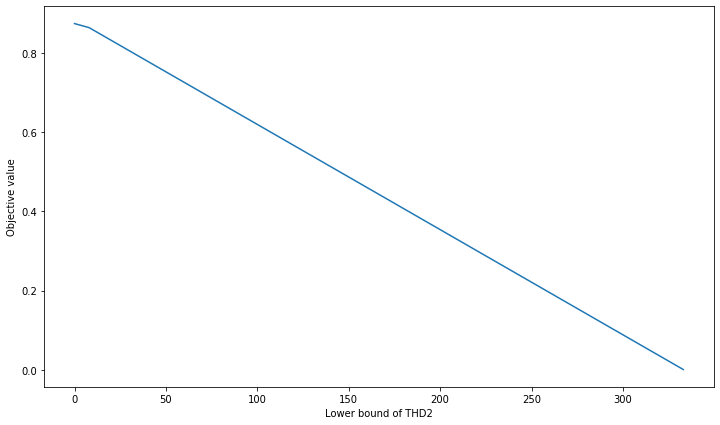

In [64]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
with model:
    X = np.arange(0, 1000)
    Y = np.zeros(X.shape)
    for i, x in enumerate(X):
        THD2 = model.reactions.get_by_id("THD2")
        THD2.lower_bound = x
        Y[i] = model.slim_optimize()
    plt.xlabel("Lower bound of THD2")
    plt.ylabel("Objective value")
    plt.plot(X, Y)

In [28]:
%%timeit
model.slim_optimize()

29.1 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit
model.optimize()

3.55 ms ± 77.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
model.summary()

In [51]:
model.metabolites.get_by_id("atp_c").summary()

## Flux variability analysis(FVA)

In [53]:
from cobra.flux_analysis import flux_variability_analysis as fva

sol = fva(model, fraction_of_optimum=0.8)
sol

,minimum,maximum
ACALD,-5.084741,0.000000
ACALDt,-5.084741,0.000000
ACKr,-7.564396,0.000000
ACONTa,0.754299,10.128462
ACONTb,0.754299,10.128462
...,...,...
TALA,-0.154536,9.249088
THD2,0.000000,69.950657
TKT1,-0.154536,9.249088
TKT2,-0.466373,8.996699


In [54]:
model.summary(fva=0.8)

In [55]:
model.metabolites.get_by_id("atp_c").summary(fva=0.8)

In [65]:
### pFBA
from cobra.flux_analysis import pfba

sol = pfba(model)
sol

,fluxes,reduced_costs
ACALD,0.000000,-2.000000
ACALDt,0.000000,-2.000000
ACKr,0.000000,2.000000
ACONTa,6.007250,-2.000000
ACONTb,6.007250,-2.000000
...,...,...
TALA,1.496984,-2.000000
THD2,0.000000,3.822222
TKT1,1.496984,-2.000000
TKT2,1.181498,-2.000000


In [66]:
sol.objective_value

518.4220855176068

In [68]:
# the objective value is the sum of fluxes
sol.fluxes.abs().sum()

518.4220855176067